In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [5]:
accuracy = []

for k in range(1, 21):
  print("k: ", k)
  acc = []
  for f in range(5):
    # divide data into folds
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    cm = ce = 0         # c for correct, m for manhattan, e for euclidean

    for i in range(len(validationX)):
      man_distance = []
      euc_distance = []

      for j in range(len(trainX)):
        
        # manhattan - calculating distance between two images
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

        # euclidean - calculation distance between two images
        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        man_distance.append([l1, trainY[j][0]])
        euc_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      man_distance = np.array(man_distance)
      man_distance = man_distance[man_distance[:, 0].argsort()]
      euc_distance = np.array(euc_distance)
      euc_distance = euc_distance[euc_distance[:, 0].argsort()]
      
      # for manhattan distance
      values = man_distance[:k, 1]

      # print(values)
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

      # print(most_frequent_value)
      if most_frequent_value == validationY[i]:
        cm += 1
        
      # for euclidean distance
      values = euc_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        ce += 1


      if i == 120:
        break

    acc.append([cm, ce])
  accuracy.append([acc, k])

print(accuracy)


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
[[[[18, 18], [29, 21], [17, 12], [24, 21], [13, 14]], 1], [[[17, 11], [21, 24], [19, 15], [24, 22], [16, 14]], 2], [[[27, 12], [27, 18], [18, 18], [25, 18], [14, 15]], 3], [[[20, 17], [29, 29], [19, 17], [20, 25], [16, 18]], 4], [[[13, 17], [25, 24], [20, 18], [24, 23], [12, 19]], 5], [[[14, 16], [24, 20], [21, 18], [25, 20], [16, 17]], 6], [[[16, 17], [27, 22], [18, 17], [25, 19], [21, 20]], 7], [[[20, 20], [28, 20], [24, 18], [22, 21], [20, 23]], 8], [[[15, 16], [28, 21], [22, 19], [23, 21], [22, 22]], 9], [[[17, 15], [27, 24], [22, 20], [27, 24], [25, 22]], 10], [[[19, 13], [26, 19], [23, 22], [23, 28], [25, 23]], 11], [[[17, 14], [24, 20], [23, 22], [26, 28], [24, 26]], 12], [[[15, 16], [21, 20], [24, 20], [23, 21], [26, 24]], 13], [[[17, 16], [20, 23], [27, 21], [20, 22], [25, 25]], 14], [[[21, 14], [20, 25], [23, 19], [23, 25], [23, 21]], 15], [[[16, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


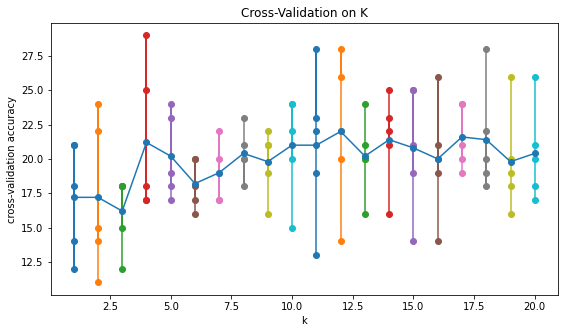

In [6]:
avg1 = []
avg2 = []
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))


plt.subplot(1,2,2)
plt.title('Cross-Validation on K')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accuracy[i][0])[:,1]
  avg2.append(np.average(l2))
  plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')

plt.show()

Is KNN a good choice or bad choice?

For image identification, KNN is a poor choice. The accuracy after employing the KNN method for image classification was only 28%, as seen in the plotted graph. As a result, it is clearly insufficient for picture classification. While KNN is unreliable for image classification, Neural Network is a better option because it uses several neurons to detect and identify images more effectively.